In [184]:
import pickle
import torch
import torch.nn as nn
import numpy as np

import utils
from utils import CMA_info
from utils import MLP
import matplotlib.pyplot as plt

In [2]:
with open('../data_size_experiment_5_repeats.p','rb') as F:
    all_info = pickle.load(F)

In [195]:
model = all_info[0][0][500000]
good_samples = torch.vstack(all_info[0][1][500000].starts)
bad_samples = torch.from_numpy(np.vstack(all_info[0][1][500000].in_dist_advs)).float()

In [196]:
layer_1 = model.layers[0]

In [197]:
w_i = layer_1.weight

In [250]:
torch.mean(w_i[NEURON_NUM].detach())

tensor(0.0267)

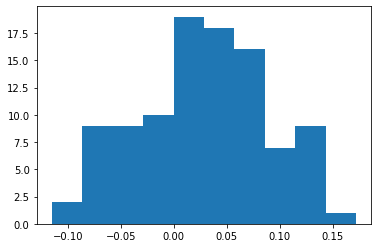

In [247]:
NEURON_NUM = 
plt.hist(np.array(w_i[NEURON_NUM].detach()))
plt.show()

In [230]:
good_w_i_eps_is = []
for sample_num in range(len(good_samples)):
    good_sample = good_samples[sample_num]
    good_w_i_eps_is.append(torch.dot(good_sample, w_i[NEURON_NUM]).item())

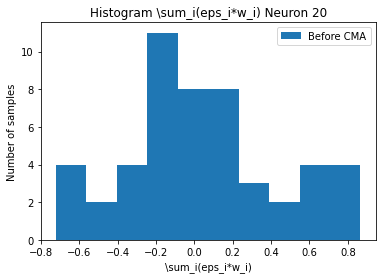

In [229]:
plt.hist(np.array(good_w_i_eps_is), label='Before CMA')
# plt.hist(,alpha=0.4,label='After CMA')
plt.title('Histogram \sum_i(eps_i*w_i) Neuron %s'%NEURON_NUM)
plt.xlabel('\sum_i(eps_i*w_i)')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

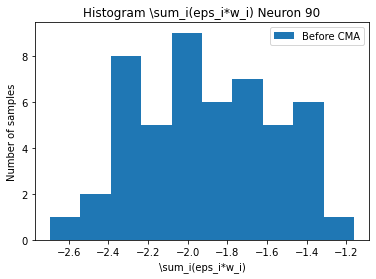

In [213]:


bad_w_i_eps_is = []
for sample_num in range(len(bad_samples)):
    bad_sample = bad_samples[sample_num]
    bad_w_i_eps_is.append(torch.dot(bad_sample, w_i[NEURON_NUM]).item())

plt.hist(np.array(good_w_i_eps_is) - np.array(bad_w_i_eps_is), label='Before CMA')
# plt.hist(,alpha=0.4,label='After CMA')
plt.title('Histogram \sum_i(eps_i*w_i) Neuron %s'%NEURON_NUM)
plt.xlabel('\sum_i(eps_i*w_i)')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

# good equal norm samples

In [150]:
# new_samples = torch.zeros((bad_samples.shape))

# for i in range(len(bad_samples)):
#     random_sample = torch.zeros((bad_samples.shape[1]))
#     r1 = torch.max(bad_samples[i])
#     r2 = torch.min(bad_samples[i])
#     new_samples[i] = (r1 - r2) * torch.rand(100) + r2

In [151]:
# def predict(model, sample):
#     return torch.argmax(model(sample),1)

In [153]:
# with open('new_samples_good_adv_range.p','wb') as F:
#     pickle.dump(new_samples, F)

In [162]:
len(new_w_i_eps_is)

50

In [163]:
len(bad_w_i_eps_is)

50

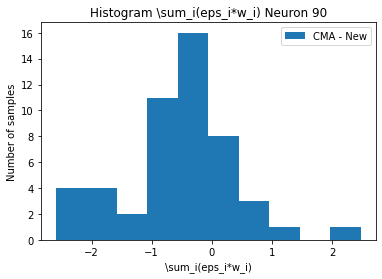

In [252]:
NEURON_NUM = 90

new_w_i_eps_is = []
for sample_num in range(len(new_samples)):
    new_sample = new_samples[sample_num]
    new_w_i_eps_is.append(torch.dot(new_sample, w_i[NEURON_NUM]).item())

bad_w_i_eps_is = []
for sample_num in range(len(bad_samples)):
    bad_sample = bad_samples[sample_num]
    bad_w_i_eps_is.append(torch.dot(bad_sample, w_i[NEURON_NUM]).item())

plt.hist(np.array(new_w_i_eps_is) - np.array(bad_w_i_eps_is), label='CMA - New')
# plt.hist(bad_w_i_eps_is,alpha=0.4,label='After CMA')
plt.title('Histogram \sum_i(eps_i*w_i) Neuron %s'%NEURON_NUM)
plt.xlabel('\sum_i(eps_i*w_i)')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

In [261]:
import random
indices = list(range(50))

In [262]:
random.shuffle(indices)

In [263]:
np.random.permutation(indices)

array([44, 30, 14, 23, 42,  6, 27, 26,  3, 21,  4,  1, 29, 37, 35, 46, 22,
       13, 15, 10, 25, 43, 40,  0, 47,  2, 31, 12, 24, 39, 45, 38, 19, 34,
       41, 33, 17,  5,  9, 49, 32, 20, 18,  7, 36, 11, 16, 48,  8, 28])

In [258]:
plt.hist(np.array(new_w_i_eps_is) - np.array(good_w_i_eps_is).random.permutation(indices), label='CMA - New')
# plt.hist(bad_w_i_eps_is,alpha=0.4,label='After CMA')
plt.title('Histogram \sum_i(eps_i*w_i) Neuron %s'%NEURON_NUM)
plt.xlabel('\sum_i(eps_i*w_i)')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'random'